In [1]:
from warnings import filterwarnings; # handle warning messages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

from scipy import stats # statistical functions

from itertools import cycle, combinations  # Igenerating combinations & cycle

filterwarnings('ignore'); # Ignore warning messages

In [2]:
class color:
    GRAY = '\033[90m'
    LIGHT_BLUE = '\033[94m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    BOLD = '\033[1m'
    RED = '\033[91m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    MAGENTA = '\033[95m'
    WHITE = '\033[97m'
    BLACK = '\033[30m'
    LIGHT_RED = '\033[91m'
    LIGHT_GREEN = '\033[92m'
    LIGHT_YELLOW = '\033[93m'
    LIGHT_BLUE = '\033[94m'
    LIGHT_MAGENTA = '\033[95m'
    LIGHT_CYAN = '\033[96m'
    LIGHT_WHITE = '\033[97m'
    RESET = '\033[0m'

# Define global styling properties
global_style = {
    "background-color": "#ff4d4d",
    "color": "#e6e6ff",
    "border": "1.5px solid black",
    "font-weight": "bold"
}

In [3]:
# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"{color.GREEN}Succesfully Configured libraries!{color.END}")

Succesfully Configured libraries!


In [4]:
# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('/home/msjahid/Downloads/Mental_Health_and_Social_Media_Balance_Dataset.csv')
    print(f"{color.GREEN}Dataset loaded successfully.{color.END}")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print(f"{color.RED}Error: File not found. Please check the file path.{color.END}")

except Exception as e:
    # Handle other exceptions
    print(f"{color.RED}An error occurred while loading the dataset: {e}{color.END}")

print(color.BLUE)

Dataset loaded successfully.



In [5]:
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [7]:
# Checking the data shape

print(f'{color.BLUE}The dataset contains{color.END} {df.shape[0]} {color.BLUE}rows and {color.END}', end='')
print(f'{df.shape[1]} {color.BLUE}columns{color.END}')

The dataset contains 500 rows and 10 columns


In [8]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

In [9]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'The data contains {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}duplicate values')

The data contains 0 duplicate values


In [10]:
def calculate_statistics(df, opacity=0.5, font_size='17px'):
    # Filter numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    stat = pd.DataFrame()  # Initialize an empty dataframe

    # Measure of central tendency
    stat['Mean'] = numeric_df.mean()  # for mean of all columns
    stat['Median'] = numeric_df.median()  # for median of all columns
    stat['Mode'] = numeric_df.mode().iloc[0]  # for mode of all columns

    # Measure of dispersion
    stat['Range'] = (numeric_df.max() - numeric_df.min())
    stat['Stdev'] = numeric_df.std()
    stat['Variance'] = numeric_df.var()

    # Interquartile range
    stat['IQR'] = [stats.iqr(numeric_df[i]) for i in numeric_df.columns]

    # Quantiles
    stat['25%'] = numeric_df.quantile(q=0.25, axis=0)
    stat['50%'] = numeric_df.quantile(q=0.50, axis=0)
    stat['75%'] = numeric_df.quantile(q=0.75, axis=0)

    # Minimum and maximum
    stat['Min'] = numeric_df.min()
    stat['Max'] = numeric_df.max()

    # Skewness and Kurtosis
    stat['Skewness'] = numeric_df.skew()
    stat['Kurtosis'] = numeric_df.kurt()

    # Transpose the DataFrame
    stat = stat.T

    # Apply the float format
    stat = stat.applymap('{:,.2f}'.format)

    # Apply the background color with transparency
    styled_df = stat.style.apply(lambda x: [f'background: rgba(173, 216, 230, {opacity})' for val in x], axis=1)
    
    # Apply font size
    styled_df = styled_df.set_properties(**{'font-size': font_size})
    
    return styled_df

In [11]:
# Calculate statistics with the modified DataFrame
stats_df = calculate_statistics(df, opacity=0.4, font_size='16px')

# Display the resulting DataFrame
stats_df

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
Mean,32.99,5.53,6.30,6.62,3.13,2.45,8.38
Median,34.00,5.60,6.00,7.00,3.00,2.00,9.00
Mode,48.00,6.20,6.00,7.00,3.00,2.00,10.00
Range,33.00,9.80,8.00,8.00,9.00,7.00,6.00
Stdev,9.96,1.73,1.53,1.54,1.86,1.43,1.52
Variance,99.21,3.01,2.34,2.38,3.45,2.04,2.32
IQR,17.00,2.40,2.00,2.00,3.00,2.00,3.00
25%,24.00,4.30,5.00,6.00,2.00,1.00,7.00
50%,34.00,5.60,6.00,7.00,3.00,2.00,9.00
75%,41.00,6.70,7.00,8.00,5.00,3.00,10.00


In [12]:
def variable_summary(df, top=1, opacity=0.5, font_size='20px'):
    # Initialize an empty list to store individual summaries
    summaries = []

    # Iterate through each column in the DataFrame
    for col in df.columns:
        dtype = df[col].dtype  # Data type of the column
        count = df[col].count()  # Count of non-null values
        unique = df[col].nunique()  # Number of unique values
        missing = df[col].isna().sum()  # Number of missing values
        
        # Calculate the top n most frequent values
        value_counts = df[col].value_counts().head(top)
        frequent_value = ', '.join([f"{value} ({count})" for value, count in value_counts.items()])
        
        # Append the summary information to the list
        summaries.append([col, dtype, count, unique, missing, frequent_value])

    # Create a DataFrame from the list of summaries
    summary_df = pd.DataFrame(summaries, columns=['Variable', 'Dtype', 'Count', 'Unique', 'Missing', 'Frequent Value'])

    # Apply background color with opacity
    styled_summary_df = summary_df.style.apply(lambda x: [f'background: rgba(42, 46, 120, {opacity})' for val in x], axis=1)

    # Apply font size to the entire DataFrame
    styled_summary_df.set_table_styles([{'selector': '', 'props': [('font-size', font_size)]}])

    return styled_summary_df

In [13]:
# DataFrame called 'df'
summary_df = variable_summary(df)
summary_df

,Variable,Dtype,Count,Unique,Missing,Frequent Value
0,User_ID,object,500,500,0,U500 (1)
1,Age,int64,500,34,0,48 (23)
2,Gender,object,500,3,0,Male (248)
3,Daily_Screen_Time(hrs),float64,500,82,0,6.2 (19)
4,Sleep_Quality(1-10),float64,500,9,0,6.0 (120)
5,Stress_Level(1-10),float64,500,9,0,7.0 (129)
6,Days_Without_Social_Media,float64,500,9,0,3.0 (92)
7,Exercise_Frequency(week),float64,500,8,0,2.0 (132)
8,Social_Media_Platform,object,500,6,0,TikTok (95)
9,Happiness_Index(1-10),float64,500,7,0,10.0 (162)


In [14]:
class Plotter:
    @staticmethod
    def format_func(value, tick_number):
        if int(value) == value:  # Check if the value is an integer
            return f'{int(value)}'
        else:
            return f'{round(value, 2)}'

    @staticmethod
    def plot_kde_histogram(df, columns, columns_per_row=3):
        # Set the seaborn style to remove white grid lines
        sns.set_style("dark")
    
        # Choose a color palette with enough colors for all the columns
        palette = sns.color_palette("dark", len(columns))

        # Calculate the number of rows required based on the number of columns and columns per row
        num_cols = len(columns)
        num_rows = (num_cols - 1) // columns_per_row + 1

        # Create figure and axes
        fig, axs = plt.subplots(num_rows, columns_per_row, figsize=(14, 4.5 * num_rows), facecolor='silver')

        # Flatten axes for easier iteration
        axs = axs.flatten()

        # Set subplot background color
        subplot_color = 'silver'

        # Loop through each numeric column in the dataset
        for i, col in enumerate(columns):
            if i < num_cols:  # Ensure not to exceed the number of columns
                row_index = i // columns_per_row  # Calculate the row index
                col_index = i % columns_per_row   # Calculate the column index

                sns.kdeplot(data=df[col], color=palette[i], fill=True, ax=axs[i])
                axs[i].set(facecolor=subplot_color, ylabel='', xlabel='')  # Set subplot background color

                # Set plot title
                title = col.replace('_', ' ').title()  # Convert column name to title format
                axs[i].set_title(f'KDE - {title}', color=palette[i], fontname='Serif', fontsize=14)

                # Rotate x-axis labels to 90 degrees for better readability
                axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)
                skew = df[col].skew()
                custom_text = '\n'.join((
                    r'$\mu=%.2f$' % df[col].mean(),
                    r'$\sigma=%.2f$' % df[col].std(),
                    rf'$\gamma=%.2f$' % skew  # Include skewness with the gamma symbol
                ))
                axs[i].text(0.83, 0.95, custom_text, transform=axs[i].transAxes, fontsize=11, verticalalignment='top',
                            color=palette[i], bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='gray', pad=0.5))

                # Set custom formatter for x-axis ticks to display integers or floating point numbers
                # axs[i].xaxis.set_major_formatter(FuncFormatter(Plotter.format_func)) 
                # axs[i].yaxis.set_major_formatter(FuncFormatter(Plotter.format_func)) 

        # Hide empty axes if there are fewer columns than the allocated number of subplots
        for j in range(num_cols, num_rows * columns_per_row):
            fig.delaxes(axs[j])

        # Adjust layout
        plt.tight_layout()

        # Show plot
        plt.show()

    @staticmethod
    def plot_hist_histogram(df, columns, columns_per_row=3):
        # Set the seaborn style to remove white grid lines
        sns.set_style("dark")
        
        # Choose a color palette with enough colors for all the columns
        palette = sns.color_palette("dark", len(columns))

        # Calculate the number of rows required based on the number of columns and columns per row
        num_cols = len(columns)
        num_rows = (num_cols - 1) // columns_per_row + 1

        # Calculate the actual number of subplots needed based on the number of columns
        num_plots = min(num_cols, columns_per_row * num_rows)

        # Create figure and axes
        fig, axs = plt.subplots(num_rows, columns_per_row, figsize=(14, 4.5 * num_rows), facecolor='silver')

        # Flatten axes for easier iteration
        axs = axs.flatten()

        # Set subplot background color
        subplot_color = 'silver'

        # Loop through each numeric column in the dataset
        for i, col in enumerate(columns):
            if i < num_plots:  # Ensure not to exceed the number of subplots needed
                row_index = i // columns_per_row  # Calculate the row index
                col_index = i % columns_per_row   # Calculate the column index

                sns.histplot(data=df, x=col, color=palette[i], kde=True, bins=round(np.sqrt(len(df))), ax=axs[i])
                axs[i].set(facecolor=subplot_color, ylabel='', xlabel='')  # Set subplot background color

                # Set plot title
                title = col.replace('_', ' ').title()  # Convert column name to title format
                axs[i].set_title(title, color=palette[i], fontname='Serif', fontsize=14)

                # Rotate x-axis labels to 45 degrees
                axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)
                skew = df[col].skew()
                custom_text = '\n'.join((
                    r'$\mu=%.2f$' % df[col].mean(),
                    r'$\sigma=%.2f$' % df[col].std(),
                    rf'$\gamma=%.2f$' % skew  # Include skewness with the gamma symbol
                ))
                axs[i].text(0.83, 0.95, custom_text, transform=axs[i].transAxes, fontsize=11, verticalalignment='top',
                            color=palette[i], bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='gray', pad=0.5))

        # Hide empty axes if there are fewer columns than the allocated number of subplots
        for j in range(num_plots, num_rows * columns_per_row):
            fig.delaxes(axs[j])

        # Adjust layout
        plt.tight_layout()

    # Show plot
    plt.show()

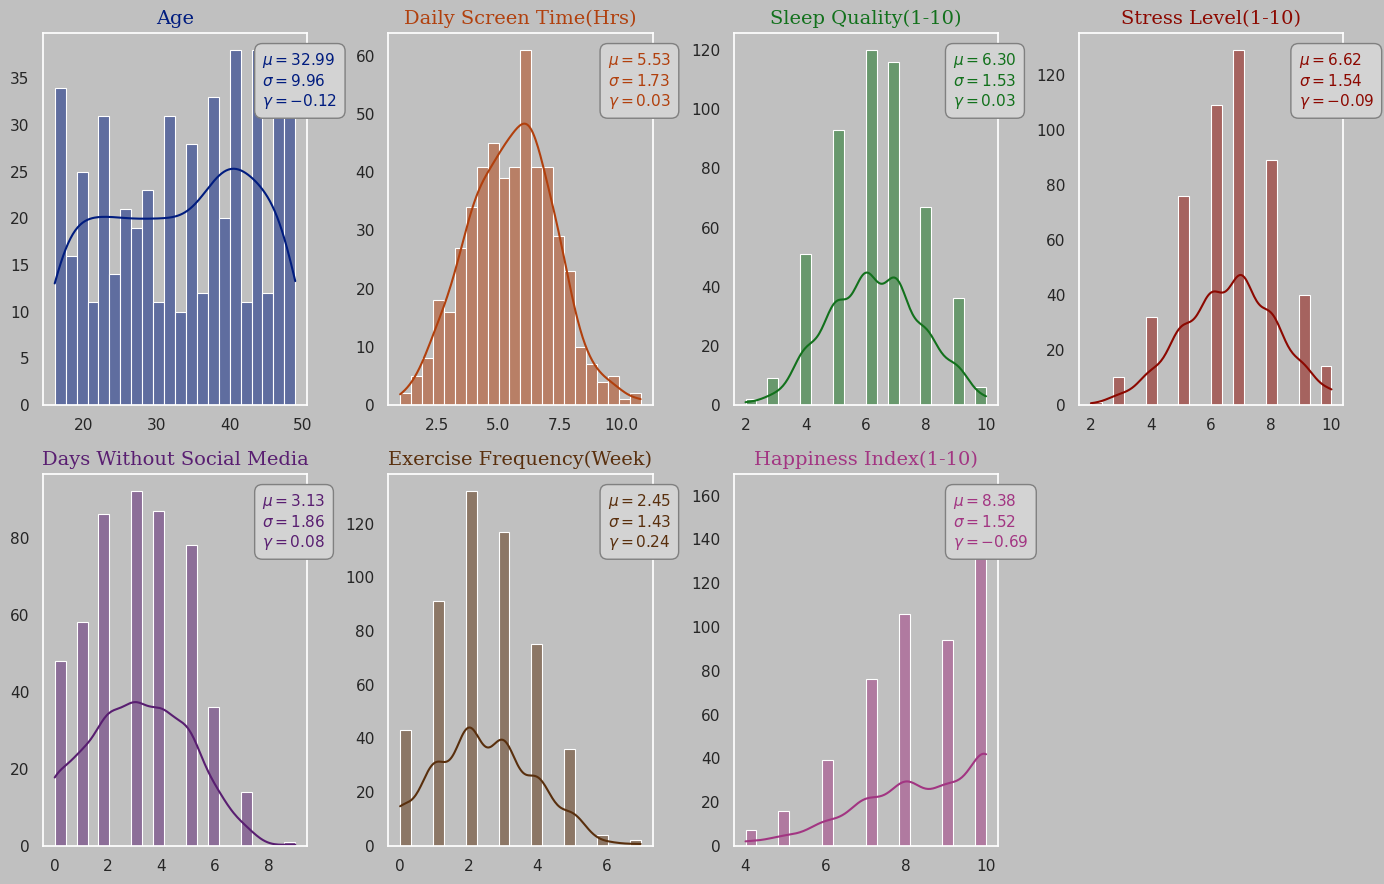

In [15]:
columns = ['Age','Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'Happiness_Index(1-10)']
Plotter.plot_hist_histogram(df, columns, columns_per_row=4)
# Save the current figure at high resolution
plt.savefig("high_res_hist.png", dpi=600, bbox_inches='tight')
plt.show()  # optional: display the figure

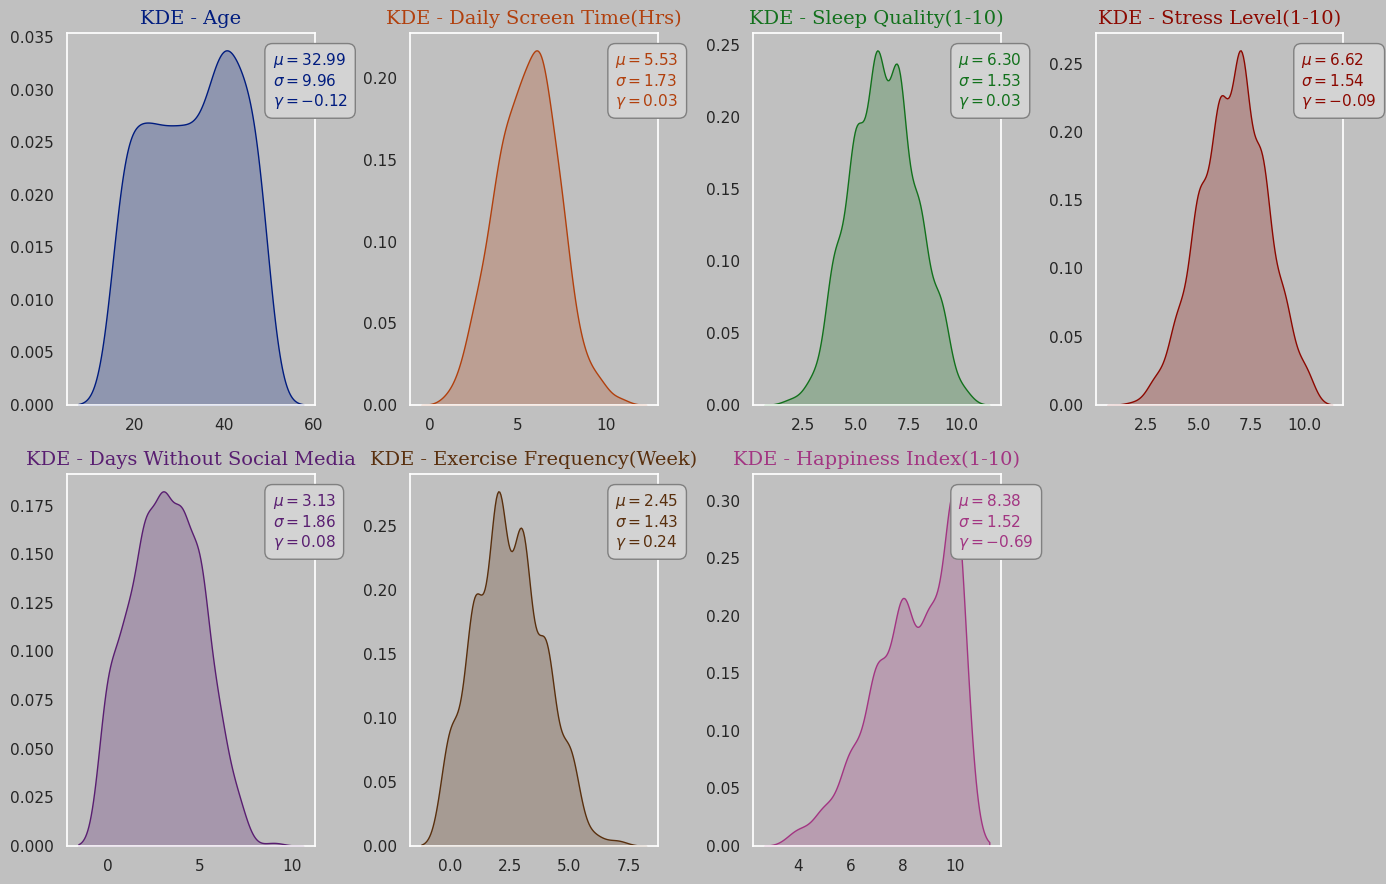

<Figure size 1000x1000 with 0 Axes>

In [16]:
columns = ['Age','Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'Happiness_Index(1-10)']
Plotter.plot_kde_histogram(df, columns, columns_per_row=4)
# Save the current figure at high resolution
plt.savefig("high_res_kde.png", dpi=600, bbox_inches='tight')
plt.show()  # optional: display the figure

In [17]:
def plot_categorical_distribution(df, categorical_features, columns_per_row=2):
    # Set up the subplot layout
    num_features = len(categorical_features)
    num_rows = (num_features - 1) // columns_per_row + 1

    # Choose a color palette with enough colors for all the features
    palette = sns.color_palette("dark", num_features)

    # Set subplot background color
    subplot_color = 'silver'

    # Create the figure and axes
    fig, ax = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(8 * columns_per_row, 5 * num_rows), facecolor='silver')

    # Flatten the axes for easier indexing
    ax = ax.flatten()

    # Loop through each categorical feature and plot its distribution
    for i, col in enumerate(categorical_features):
        # Calculate frequency percentages
        value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

        # Plot the bar chart
        value_counts.plot(kind='barh', ax=ax[i], width=0.8, color=palette[i])

        # Add frequency percentages to the bars
        for index, value in enumerate(value_counts):
            ax[i].text(value, index, f'{value:.1f}%', fontsize=12, weight='bold', va='center')

        ax[i].set_xlim([0, 100])
        ax[i].set_xlabel('Frequency Percentage', fontsize=12)
        ax[i].set_title(col.replace('_', ' '), fontsize=14, color=palette[i], fontname='Serif')
        ax[i].set_facecolor(subplot_color)

    # Hide any remaining subplots if there are fewer features than expected
    for j in range(num_features, num_rows * columns_per_row):
        ax[j].axis('off')

    # Adjust the layout and display the plot
    plt.suptitle('Exploring Numeric and Categorical Data', fontsize=18, color='#FF5733', fontweight='bold')
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.93, wspace=0.4, hspace=0.4)
    plt.show()

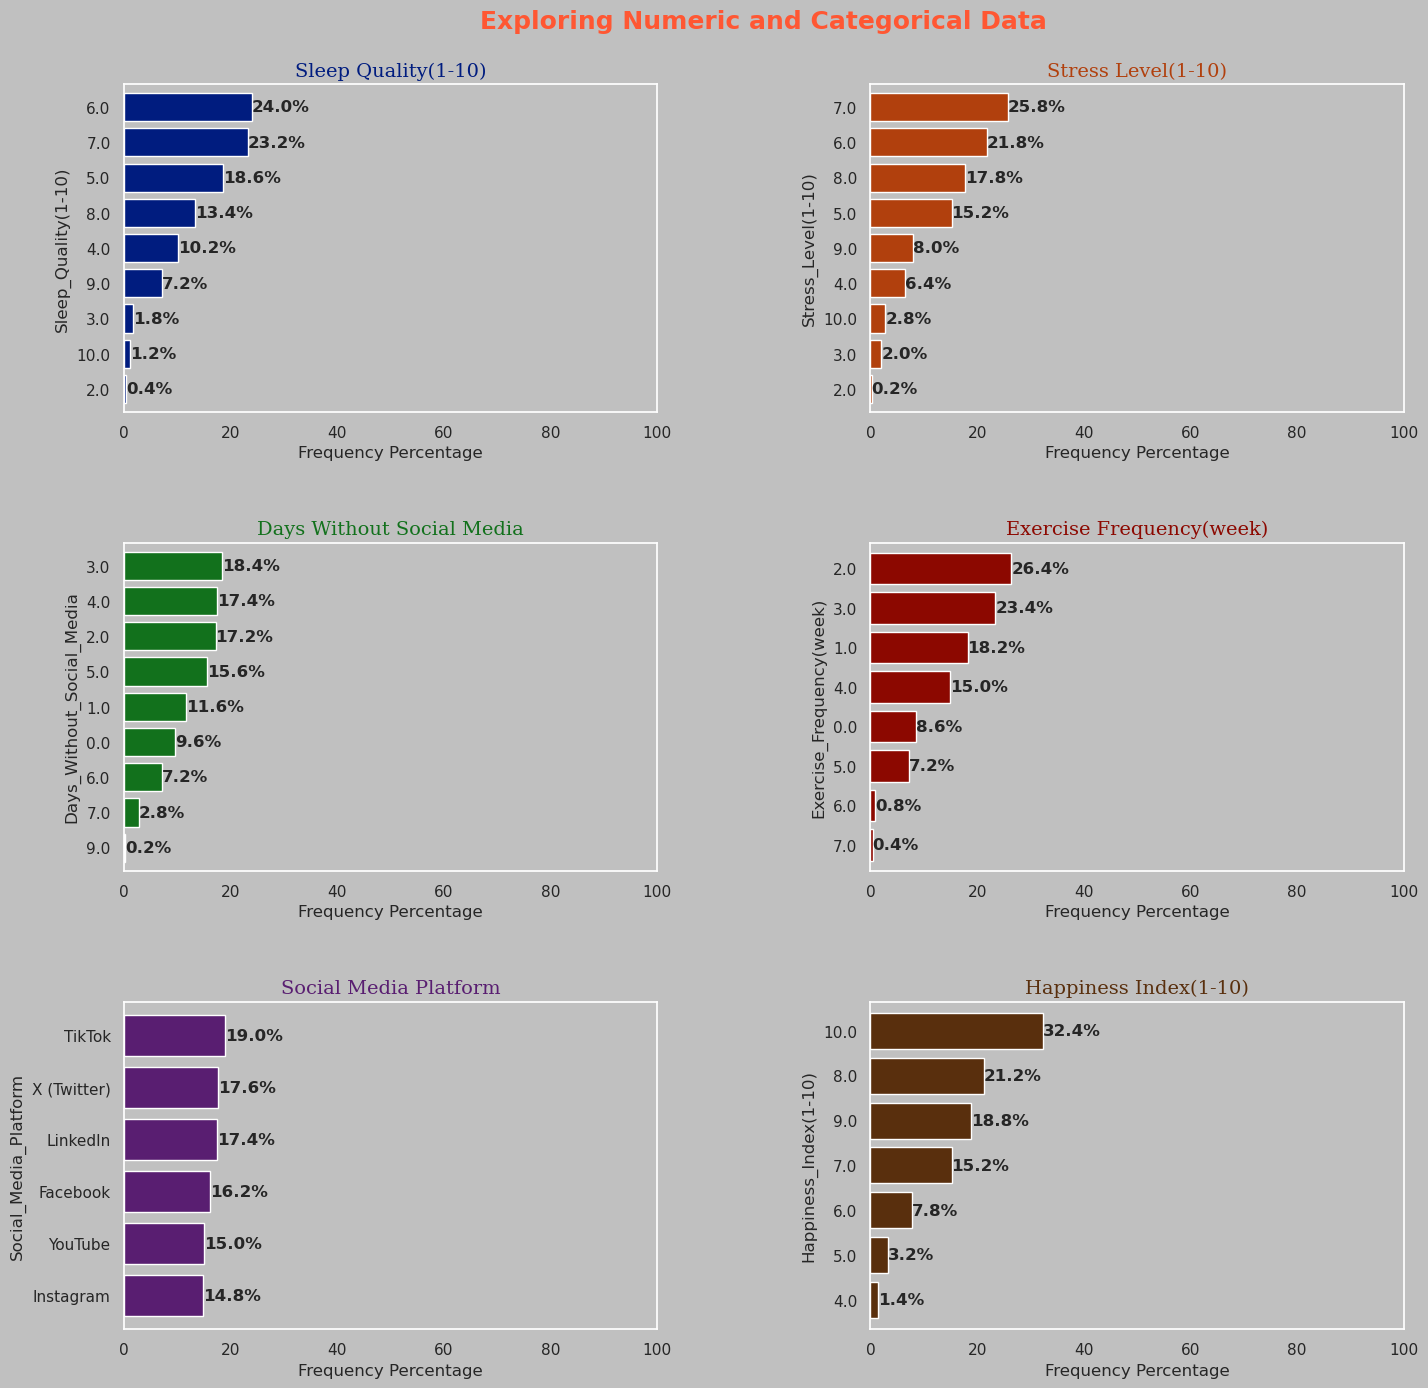

<Figure size 1000x1000 with 0 Axes>

In [18]:
# Example usage:
categorical_features =  ['Sleep_Quality(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'Social_Media_Platform', 'Happiness_Index(1-10)']
plot_categorical_distribution(df, categorical_features)
plt.savefig("categorical_data.png", dpi=600, bbox_inches='tight')
plt.show()  # optional: display the figure

In [19]:
def plot_continuous_vs_target(df, continuous_features, target):
    # Set color palette
    palette = sns.color_palette("dark")

    # Create the subplots
    fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 23), gridspec_kw={'width_ratios': [1, 2]}, facecolor='silver')

    # Loop through each continuous feature to create barplots and KDE plots
    for i, col in enumerate(continuous_features):
        # Barplot showing the mean value of the feature for each target category
        graph = sns.barplot(data=df, x=target, y=col, ax=ax[i,0], palette=palette)

        # KDE plot showing the distribution of the feature for each target category
        for val, color in zip(df[target].unique(), palette):
            sns.kdeplot(data=df[df[target]==val], x=col, fill=True, linewidth=2, ax=ax[i,1], label=str(val), color=color)

        ax[i,1].set_yticks([])
        ax[i,1].legend(
            title=target,
            loc='upper right',
            facecolor='lightgray',
            fontsize=8,
            title_fontsize=9,
            borderpad=0.2,        # shrink padding inside the box
            labelspacing=0.2,     # reduce vertical space between labels
            handlelength=1.0,     # shorten color line/marker length
            handletextpad=0.3,    # reduce gap between handle and text
            framealpha=0.8        # optional: change box transparency
        )

        # Add mean values to the barplot
        for cont in graph.containers:
            graph.bar_label(cont, fmt='%.3g')

        # Set face color to silver
        ax[i,0].set_facecolor('silver')
        ax[i,1].set_facecolor('silver')

        # Set plot title
        title = col.replace('_', ' ').title()  # Convert column name to title format
        ax[i,0].set_title(title, color=palette[i], fontname='Serif', fontsize=14)
        ax[i,1].set_title(f'KDE - {title}', color=palette[i], fontname='Serif', fontsize=14)

        # Set axis labels
        x_label = target.replace('_', ' ').title()  # Convert target column name to title format for x-axis label
        y_label = col.replace('_', ' ').title()    # Convert continuous feature column name to title format for y-axis label
        ax[i,0].set_xlabel(x_label, color=palette[i], fontname='Serif', fontsize=12)
        ax[i,0].set_ylabel(y_label, color=palette[i], fontname='Serif', fontsize=12)
        ax[i,1].set_xlabel(y_label, color=palette[i], fontname='Serif', fontsize=12)
        ax[i,1].set_ylabel('Density', color=palette[i], fontname='Serif', fontsize=12)

    # Set the title for the entire figure
    plt.suptitle('Continuous Features vs Target Distribution', fontsize=16, color='#FF5733', fontweight='bold')
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.95, wspace=0.4, hspace=0.7)
    plt.show()

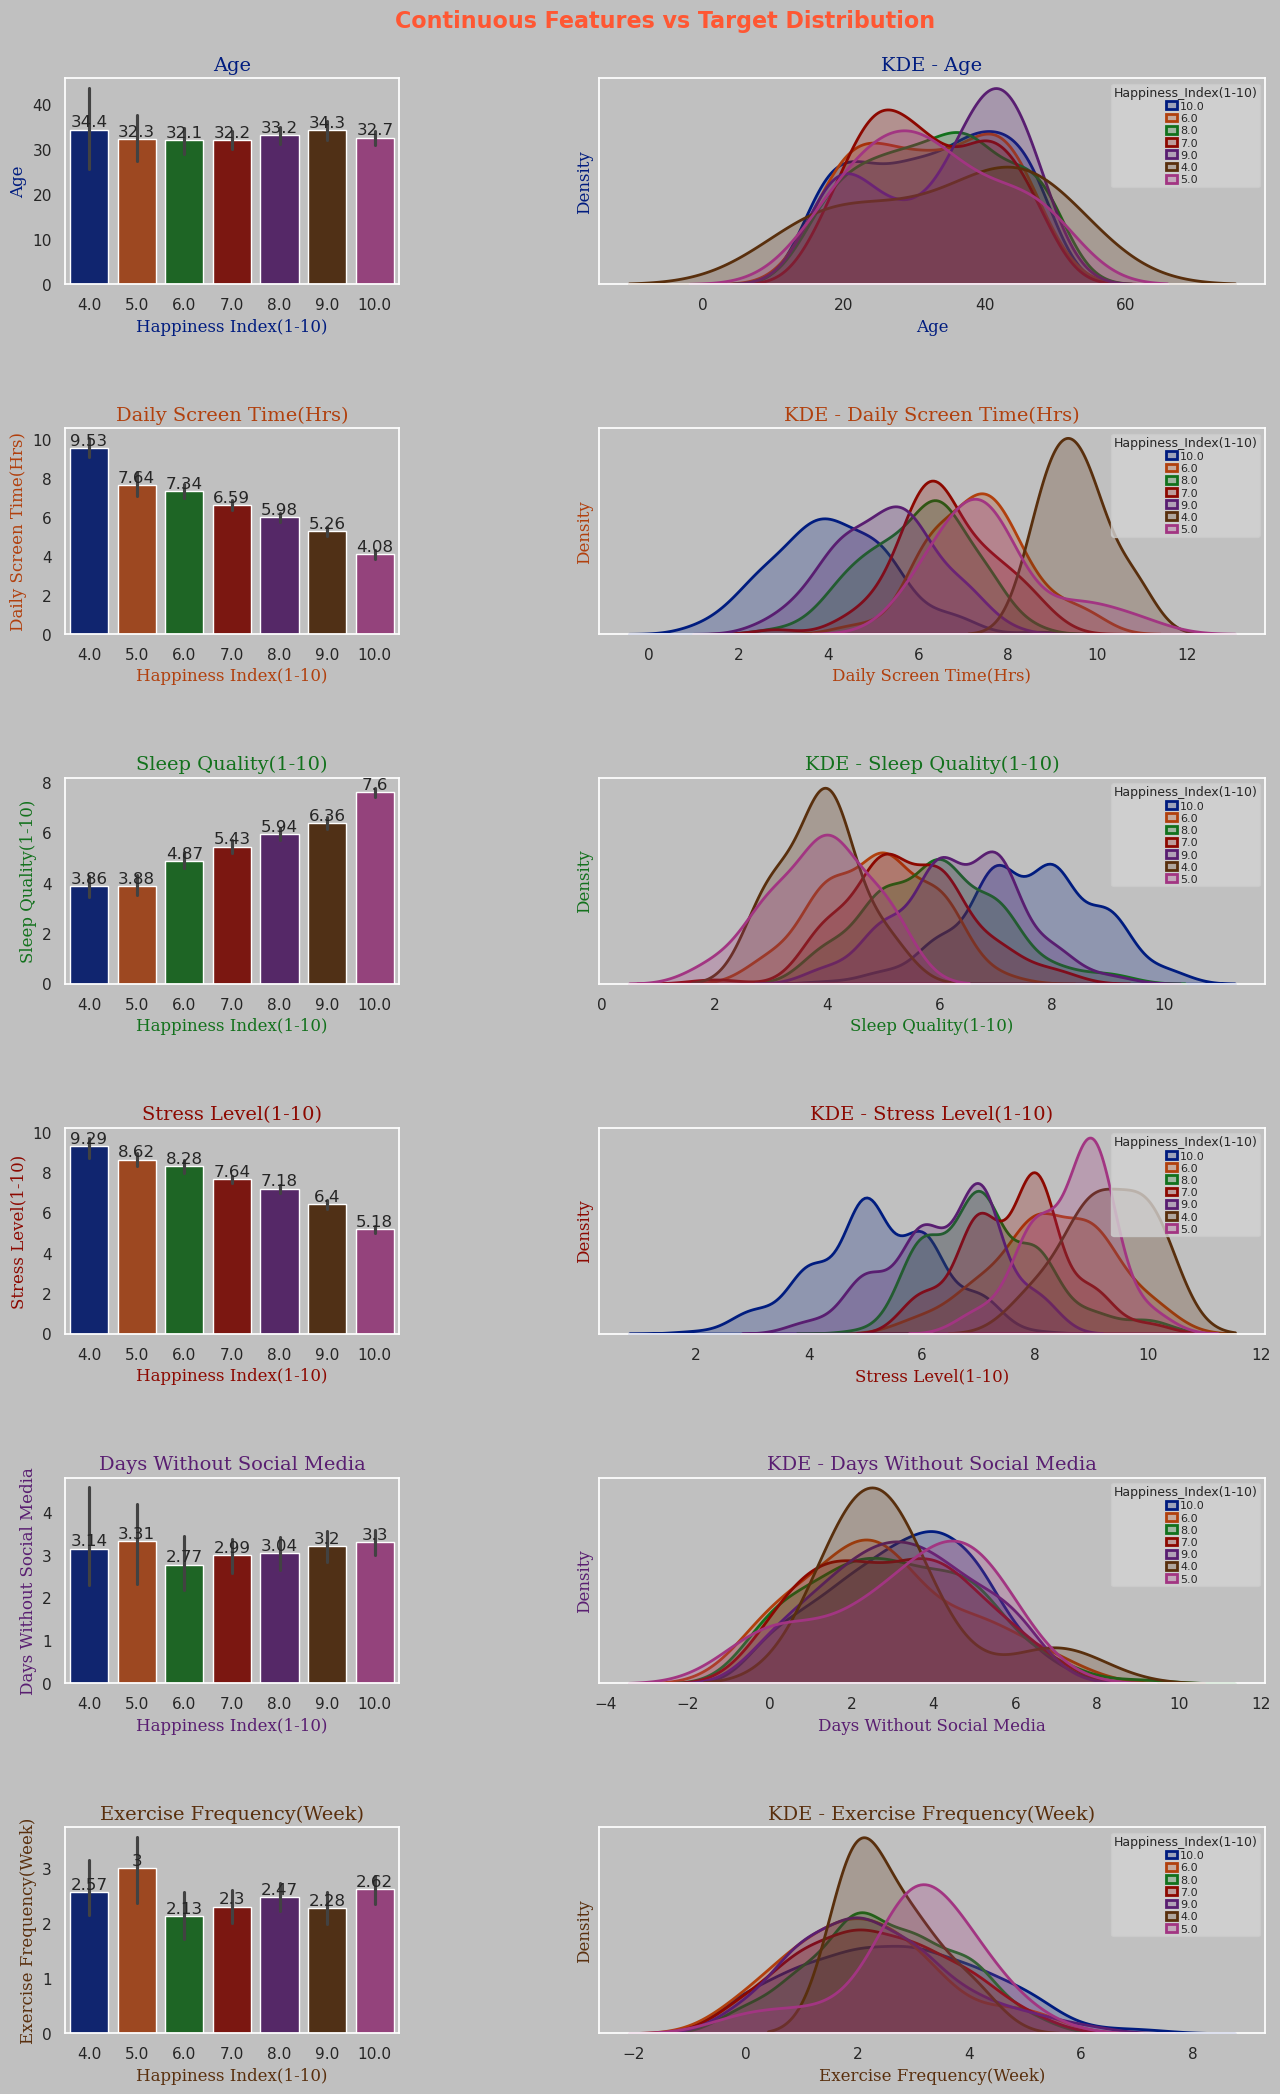

<Figure size 1000x1000 with 0 Axes>

In [22]:
# Example usage:
plot_continuous_vs_target(df, columns[:-1], "Happiness_Index(1-10)")
plt.savefig("continuous_vs_target.png", dpi=600, bbox_inches='tight')
plt.show()